# BioSound Tutorial 1.  From wav files to h5 files.
### This notebook illustrates how to generate BioSound objects from sounds stored as wav files.  BioSound contains many parameters and it is up to the user to calculate some or all.  This script calculates all the parameters.

In the BioSound approach the sounds have been previously segmented into units (here as separate wav files) of interest. Here we are going to analyze different renditions of the distance calls of different zebra finches to examine the individual signature.  The sound units could also be different bird songs from different birds, or different speech vowel sounds or different musical instruments all playing the same note.  

## Installation instructions.

Before starting it is expected that
 1. You have downloaded all the files in github/theunissenlab/BioSoundTutorial including the sound files in github/theunissenlab/BioSoundTutorial/BirdCalls.  BirdCalls has 25 renditions of Distance Calls produced by 4 different zebra finches.
 2. You have a working version of Python and IPython to run this notebook.  The code was originally written in Python 2.7 but updated to Python 3 (3.6)
 3. You have installed the python package soundsig: <code> pip install soundsig <code>

## Step 1. Loading all the dependencies.  These should have been installed when you installed soundsig.

In [1]:
# Import math, plotting and sound libraries
import numpy as np
import matplotlib.pyplot as plt
from soundsig.sound import BioSound 
from soundsig.sound import WavFile
import os

# Make plots on this Notebook.
%matplotlib inline


/Users/frederictheunissen/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


## Step 2. Specifying the location of the test sound files and where to save the output.
### YOU WILL WANT TO CHANGE TO FOLLOWING CODE TO POINT TO THE RIGHT PLACE



In [2]:
# Go to the folder that has the wav files
os.chdir('/Users/frederictheunissen/Documents/Code/BioSoundTutorial/BirdCalls')

# This will be the output directory
if not os.path.exists('h5files'):
    os.makedirs('h5files')
    


## Step3. Loop through all the files in the folder, make BioSound objects and plot the first two.

The plotting routine in BioSound (.plot()) generates a variable number of graphs depending on what has been calculated.  The first figure shows the oscillogram and spectrogram of the sound.  The red bold line on the oscillogram is the amplitude enveloppe.  The black bold line on the spectrogram is the estimated fundamental frequency. The purple bold line on the spectrogram is the estimated fundamental frequency of a second voice (when it exists). The red, white and blue bold lines on the specrogram are the estimated first, second and third formants (F1, F2, F3).  The second figure is a power spectrum. The black dotted lines show the quartiles.  The red, light blue and dark blue dotted lines are the time average values of F1,F2, F3. The third figure shows the values of other BioSound parameters.  The fourth figure shows the modulation power spectrum.
The calculations last approximately 1 minute for a 1 second sound on 2.7 GHz Intel Core i7.  The slowest routine is the fundamental estimator. 

Processing sound 1:YelGre5275_110728-DC-26.wav

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                Bird b'YelGre5275'    Call Type b'DC'


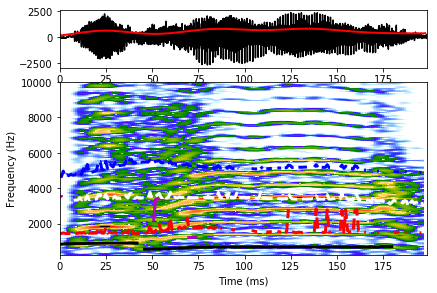

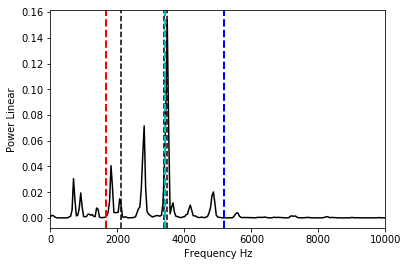

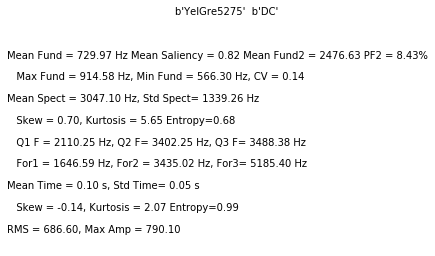

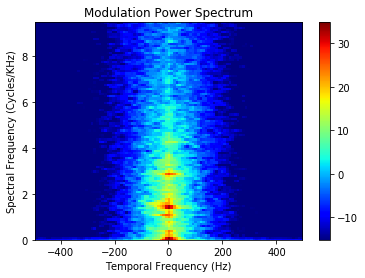

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Processing sound 2:WhiRas44dd_110620-DC-08.wav

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
                Bird b'WhiRas44dd'    Call Type b'DC'


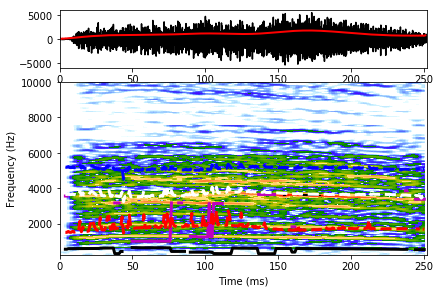

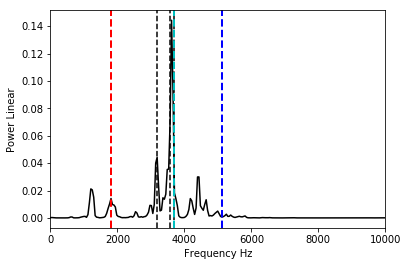

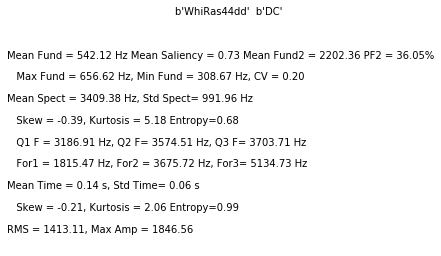

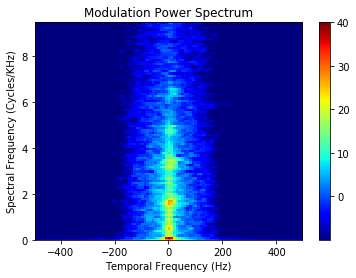

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Processing sound 3:WhiRas44dd_110620-DC-20.wav

Processing sound 4:YelOra2575_110630-DC-46.wav



/Users/frederictheunissen/anaconda3/lib/python3.6/site-packages/scipy/optimize/minpack.py:436: RuntimeWarning: Number of calls to function has reached maxfev = 2200.
  warnings.warn(errors[info][0], RuntimeWarning)


Processing sound 5:WhiLbl0010_110502-DC-20.wav

Processing sound 6:WhiLbl0010_110502-DC-21.wav

Processing sound 7:YelOra2575_110630-DC-47.wav

Processing sound 8:WhiRas44dd_110620-DC-21.wav

Processing sound 9:WhiRas44dd_110620-DC-09.wav

Processing sound 10:YelGre5275_110728-DC-25.wav

Processing sound 11:YelGre5275_110728-DC-19.wav

Processing sound 12:WhiRas44dd_110620-DC-23.wav

Processing sound 13:WhiLbl0010_110429-DC-17.wav

Processing sound 14:YelOra2575_110630-DC-45.wav

Processing sound 15:WhiLbl0010_110502-DC-23.wav

Processing sound 16:WhiLbl0010_110422-DC-13.wav

Processing sound 17:WhiLbl0010_110411-DC-01.wav

Processing sound 18:WhiLbl0010_110502-DC-22.wav

Processing sound 19:YelOra2575_110630-DC-50.wav

Processing sound 20:YelOra2575_110630-DC-44.wav

Processing sound 21:WhiLbl0010_110429-DC-16.wav

Processing sound 22:WhiRas44dd_110620-DC-22.wav

Processing sound 23:YelGre5275_110728-DC-24.wav

Processing sound 24:YelGre5275_110728-DC-20.wav

Processing sound 25:YelOr

In [3]:
# Plot flag to decide whether or not to plot output
plotMe = True
normalize = False

# Find all the wave files 
isound = 0   
for fname in os.listdir('.'):
    if fname.endswith('.wav'):
        isound += 1;
        
        # Read the sound file
        print ('Processing sound %d:%s\n' % (isound, fname))
        soundIn = WavFile(file_name=fname) 
        filename, file_extension = os.path.splitext(fname)
        
        
        # Here we parse the filename to get the birdname and the call type. 
        # You will have to write custom code to extract your own identifiers.
        birdname = filename[0:10]
        calltype = filename[18:20]
        
        # Normalize if wanted
        if normalize :
            maxAmp = np.abs(soundIn.data).max() 
        else :
            maxAmp = 1.0
    
    # Create BioSound Object
        myBioSound = BioSound(soundWave=soundIn.data.astype(float)/maxAmp, fs=float(soundIn.sample_rate), emitter=birdname, calltype = calltype)
             
    # Calculate the spectrogram and the rms
        myBioSound.spectroCalc(spec_sample_rate=1000)
        myBioSound.rms = myBioSound.sound.std() 
       
    # Calculate amplitude enveloppe
        myBioSound.ampenv()
       
    # Calculate the power spectrum
        myBioSound.spectrum(f_high=10000)
    
    # Calculate fundamental and related values.  These are the default values.
        myBioSound.fundest(maxFund = 1500, minFund = 300, lowFc = 200, highFc = 6000, minSaliency = 0.5, debugFig = 0)
      
    # Calculate the MPS
        myBioSound.mpsCalc(window=0.1, Norm = True)
                
        if plotMe and isound <= 2: 
            print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
            print('                Bird %s    Call Type %s' % (myBioSound.emitter, myBioSound.type))
            myBioSound.plot()  
            print('++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++')
    

    # Save the results
        fh5name = 'h5files/%s.h5' % (filename)
        myBioSound.saveh5(fh5name)